# Laboratory 1 - Introduction to Numerical Methods for Data Science

## Week 1 - NumPy, Matplotlib, PyTorch, JAX.

The goal of the first laboratory is to refresh your knowledge related to Python and familiarize yourself with external libraries that we will use during the course:

1.  NumPy
2.  Matplotlib
3.  PyTorch
4.  JAX

There are seven exercises to complete. The notebook should be submitted using MSTeams before the next meeting. Do not use Gemini or other LLMs to solve the tasks.

References to use:
1. NumPy - https://numpy.org/doc/
2. PyTorch - https://pytorch.org/tutorials/beginner/basics/intro.html
3. Matplotlib - https://matplotlib.org/stable/tutorials/pyplot.html
4. JAX - https://docs.jax.dev/en/latest/quickstart.html

In [ ]:
import numpy as np
import torch as tc
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt

### Task 1 - Basic Python - Functions


Write a function that takes any number of arguments and returns their sum squared.

In [ ]:
def sum_squared(*args):
  sum = 0
  for i in args:
    sum = sum + i**2

  return sum

Test your function below:

In [ ]:
sum_squared(1, 2, 3, 4, 5)

55

### Task 2 - Basic Python - Generators

Write a generator that will generate integers in a given range (remember about the yield keyword).

In [ ]:
def my_generator(start : int, stop : int):
  for i in range(start, stop):
    yield i

Test your implementation below:

In [ ]:
example_gen = my_generator(1, 5)
for item in example_gen:
  print(item)

1
2
3
4


### Task 3 - NumPy & Matplotlib

a) Generate an array of natural logarithm values for input values ​​ranging from 0 to 5 for 200 uniformly, monotonically distributed values.

In [ ]:

vals = np.linspace(0.04, 5, num=200)
log_vals = np.log(vals)

print(log_vals)

[-3.21887582 -2.73452833 -2.40962205 -2.16479144 -1.9682688  -1.80409657
 -1.66311437 -1.5395744  -1.42963208 -1.3305887  -1.24047694 -1.15781832
 -1.08147357 -1.01054619 -0.94431804 -0.88220494 -0.82372529 -0.76847739
 -0.71612268 -0.66637315 -0.61898178 -0.5737351  -0.53044736 -0.48895596
 -0.44911774 -0.41080598 -0.37390801 -0.33832319 -0.30396127 -0.27074096
 -0.23858885 -0.20743838 -0.17722902 -0.14790556 -0.11941754 -0.09171865
 -0.06476635 -0.03852146 -0.01294778  0.01198816  0.03631739  0.06006875
  0.08326904  0.10594326  0.12811474  0.14980529  0.17103533  0.191824
  0.2121893   0.23214811  0.25171636  0.27090902  0.28974025  0.30822342
  0.32637114  0.34419539  0.36170749  0.37891818  0.39583767  0.41247565
  0.42884133  0.44494349  0.46079046  0.47639023  0.49175037  0.50687814
  0.52178048  0.53646398  0.550935    0.5651996   0.57926357  0.59313248
  0.60681168  0.62030628  0.6336212   0.64676116  0.6597307   0.67253417
  0.68517579  0.6976596   0.70998947  0.72216917  0.7

b) Add normal noise to the generated values ​​with a mean value of 0 and a standard deviation of 0.2.

In [ ]:
noise = np.random.normal(loc=0, scale=0.2, size=log_vals.shape)
log_vals_distorted = log_vals + noise

c) Draw a plot simultaneously presenting the original values and the values with added noise - use two different colors on the same plot (use matplotlib).

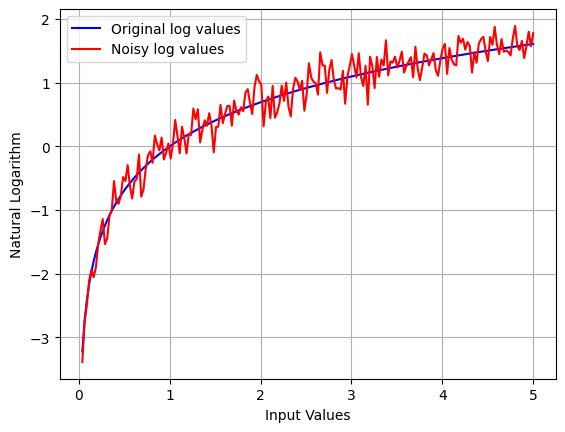

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

vals = np.linspace(0.04, 5, 200)
log_vals = np.log(vals)

noise = np.random.normal(loc=0, scale=0.2, size=log_vals.shape)
log_vals_distorted = log_vals + noise

plt.figure(dpi=100)
plt.plot(vals, log_vals, "b-", label="Original log values")
plt.plot(vals, log_vals_distorted, "r-", label="Noisy log values")

plt.grid(True)
plt.xlabel("Input Values")
plt.ylabel("Natural Logarithm")
plt.legend()
plt.show()

d) Remove the noise by averaging neighboring values ​​using a uniform filter with different window sizes (3, 7, 13). Ignore boundary values.

In [ ]:
window_size = 3

filtered_values = log_vals_distorted.copy()

half_window = window_size // 2
for i in range(half_window, len(log_vals_distorted) - half_window):
    filtered_values[i] = np.mean(log_vals_distorted[i - half_window : i + half_window + 1])

print(filtered_values)

[-3.46504083 -2.73750732 -2.30432272 -1.8736747  -1.90999945 -1.82921451
 -1.91969787 -1.65047336 -1.60857954 -1.46913045 -1.46031929 -1.17790165
 -1.01498288 -0.81603884 -0.90585252 -0.98026289 -1.06820119 -0.97285929
 -0.75909579 -0.72983194 -0.55440645 -0.5573152  -0.47008516 -0.45776515
 -0.51901742 -0.35746043 -0.35319071 -0.27099875 -0.31106115 -0.32557428
 -0.21286613 -0.27778121 -0.13761115 -0.08180951  0.02197519 -0.09151913
 -0.12622889 -0.18673954 -0.06721774 -0.16214762 -0.04426739  0.00636185
  0.12489521  0.15078343  0.12270637  0.14981746  0.22244396  0.28635763
  0.33652767  0.30358351  0.31950681  0.24206989  0.30513107  0.32438681
  0.42291205  0.3876825   0.42799917  0.45496049  0.46929239  0.45010352
  0.50143446  0.47687954  0.49977576  0.57570263  0.63546919  0.69000431
  0.51549497  0.50983181  0.56652364  0.66282509  0.64946696  0.64823039
  0.66139881  0.59871079  0.52886294  0.42624364  0.59814158  0.65999924
  0.83273916  0.75508758  0.60738916  0.5978426   0

e) Plot the result again, this time showing the original generated values ​​and three plots of the values ​​averaged over different window sizes. Add grid, axis captions, legend.

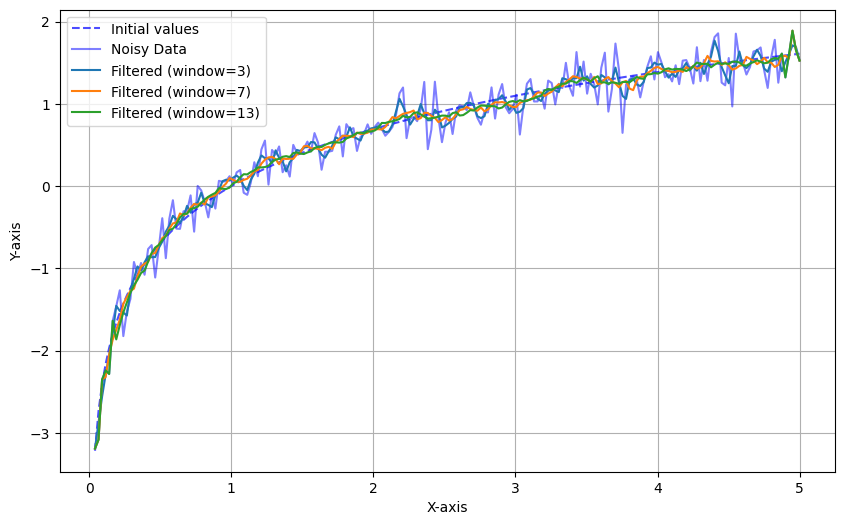

In [ ]:
vals = np.linspace(0.04, 5, 200)
log_vals = np.log(vals)

noise = np.random.normal(loc=0, scale=0.2, size=log_vals.shape)
log_vals_distorted = log_vals + noise

window_sizes = [3, 7, 13]

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(vals, log_vals, label="Initial values", color="blue", linestyle="--", alpha=0.7)

plt.plot(vals, log_vals_distorted, label="Noisy Data", color="blue", alpha=0.5)

for window_size in window_sizes:
    filtered_values = log_vals_distorted.copy()
    half_window = window_size // 2

    for i in range(half_window, len(log_vals_distorted) - half_window):
        filtered_values[i] = np.mean(log_vals_distorted[i - half_window:i + half_window + 1])

    plt.plot(vals, filtered_values, label=f"Filtered (window={window_size})")

plt.grid(True)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

### Task 4 - NumPy & PyTorch & JAX

a) Generate two vectors of 10,000,000 random numbers using the NumPy, PyTorch, and JAX libraries. Add them together and measure the addition time. Which library is faster? Check and output time for different data types (int/float16/float32/float64)

In [ ]:
import time
import numpy as np
import torch as tc
import jax.numpy as jnp
from jax import random

dtypes = [np.int32, np.float16, np.float32, np.float64]

def measure_addition_time(lib_name, v1, v2, dtype):
    start_time = time.time()
    v3 = v1 + v2
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Elapsed time for {lib_name} ({dtype}): {elapsed_time:.4f} seconds")
    return elapsed_time

print("NumPy:")
for dtype in dtypes:
    v1_np = np.random.rand(10_000_000).astype(dtype)
    v2_np = np.random.rand(10_000_000).astype(dtype)
    measure_addition_time("NumPy", v1_np, v2_np, dtype)

print("\nPyTorch:")
for dtype in dtypes:
    if dtype == np.int32:
        v1_tc = tc.randint(0, 100, (10_000_000,), dtype=tc.int32)
        v2_tc = tc.randint(0, 100, (10_000_000,), dtype=tc.int32)
    else:
        torch_dtype = {
            np.float16: tc.float16,
            np.float32: tc.float32,
            np.float64: tc.float64,
        }[dtype]
        v1_tc = tc.rand(10_000_000, dtype=torch_dtype)
        v2_tc = tc.rand(10_000_000, dtype=torch_dtype)

    measure_addition_time("PyTorch", v1_tc, v2_tc, dtype)

print("\nJAX:")
for dtype in dtypes:
    jax_dtype = {
        np.int32: jnp.int32,
        np.float16: jnp.float16,
        np.float32: jnp.float32,
        np.float64: jnp.float64,
    }[dtype]

    key = random.PRNGKey(0)

    if dtype == np.int32:
        v1_jnp = random.randint(key, shape=(10_000_000,), minval=0, maxval=100, dtype=jax_dtype)
        key, subkey = random.split(key)
        v2_jnp = random.randint(subkey, shape=(10_000_000,), minval=0, maxval=100, dtype=jax_dtype)
    else:
        v1_jnp = random.uniform(key, shape=(10_000_000,), dtype=jax_dtype)
        key, subkey = random.split(key)
        v2_jnp = random.uniform(subkey, shape=(10_000_000,), dtype=jax_dtype)

    measure_addition_time("JAX", v1_jnp, v2_jnp, dtype)


NumPy:
Elapsed time for NumPy (<class 'numpy.int32'>): 0.0153 seconds
Elapsed time for NumPy (<class 'numpy.float16'>): 0.0963 seconds
Elapsed time for NumPy (<class 'numpy.float32'>): 0.0151 seconds
Elapsed time for NumPy (<class 'numpy.float64'>): 0.0291 seconds

PyTorch:
Elapsed time for PyTorch (<class 'numpy.int32'>): 0.0303 seconds
Elapsed time for PyTorch (<class 'numpy.float16'>): 0.0168 seconds
Elapsed time for PyTorch (<class 'numpy.float32'>): 0.0234 seconds
Elapsed time for PyTorch (<class 'numpy.float64'>): 0.0466 seconds

JAX:
Elapsed time for JAX (<class 'numpy.int32'>): 0.0293 seconds
Elapsed time for JAX (<class 'numpy.float16'>): 0.0306 seconds
Elapsed time for JAX (<class 'numpy.float32'>): 0.0297 seconds
Elapsed time for JAX (<class 'numpy.float64'>): 0.0001 seconds


<ipython-input-24-ef2c7f7352e7>:62: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'>  is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  v1_jnp = random.uniform(key, shape=(10_000_000,), dtype=jax_dtype)
<ipython-input-24-ef2c7f7352e7>:64: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'>  is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  v2_jnp = random.uniform(subkey, shape=(10_000_000,), dtype=jax_dtype)


b) Repeat the same experiment, but this time use the GPU available in Google Colab to accelerate the computations using PyTorch and JAX libraries. What are the differences now? We will get back to JAX when introducing gradients and autodifferentation.

In [ ]:
import time
import numpy as np
import torch as tc
import jax.numpy as jnp
from jax import random, device_put

device = "cuda" if tc.cuda.is_available() else "cpu"
print(f"Using device: {device}")

dtypes = [np.int32, np.float16, np.float32, np.float64]

def measure_addition_time(lib_name, v1, v2, dtype):
    start_time = time.time()
    v3 = v1 + v2
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Elapsed time for {lib_name} ({dtype}): {elapsed_time:.4f} seconds")
    return elapsed_time

print("NumPy:")
for dtype in dtypes:
    v1_np = np.random.rand(10_000_000).astype(dtype)
    v2_np = np.random.rand(10_000_000).astype(dtype)
    measure_addition_time("NumPy", v1_np, v2_np, dtype)

print("\nPyTorch (GPU):")
for dtype in dtypes:
    if dtype == np.int32:
        v1_tc = tc.randint(0, 100, (10_000_000,), dtype=tc.int32).to(device)
        v2_tc = tc.randint(0, 100, (10_000_000,), dtype=tc.int32).to(device)
    else:
        torch_dtype = {
            np.float16: tc.float16,
            np.float32: tc.float32,
            np.float64: tc.float64,
        }[dtype]
        v1_tc = tc.rand(10_000_000, dtype=torch_dtype).to(device)
        v2_tc = tc.rand(10_000_000, dtype=torch_dtype).to(device)

    measure_addition_time("PyTorch", v1_tc, v2_tc, dtype)

print("\nJAX (GPU):")
for dtype in dtypes:
    jax_dtype = {
        np.int32: jnp.int32,
        np.float16: jnp.float16,
        np.float32: jnp.float32,
        np.float64: jnp.float64,
    }[dtype]

    key = random.PRNGKey(0)

    if dtype == np.int32:
        v1_jnp = random.randint(key, shape=(10_000_000,), minval=0, maxval=100, dtype=jax_dtype)
        key, subkey = random.split(key)
        v2_jnp = random.randint(subkey, shape=(10_000_000,), minval=0, maxval=100, dtype=jax_dtype)
    else:
        v1_jnp = random.uniform(key, shape=(10_000_000,), dtype=jax_dtype)
        key, subkey = random.split(key)
        v2_jnp = random.uniform(subkey, shape=(10_000_000,), dtype=jax_dtype)

    v1_jnp = device_put(v1_jnp)
    v2_jnp = device_put(v2_jnp)

    measure_addition_time("JAX", v1_jnp, v2_jnp, dtype)


Using device: cuda
NumPy:
Elapsed time for NumPy (<class 'numpy.int32'>): 0.0447 seconds
Elapsed time for NumPy (<class 'numpy.float16'>): 0.1674 seconds
Elapsed time for NumPy (<class 'numpy.float32'>): 0.0153 seconds
Elapsed time for NumPy (<class 'numpy.float64'>): 0.0294 seconds

PyTorch (GPU):
Elapsed time for PyTorch (<class 'numpy.int32'>): 0.0539 seconds
Elapsed time for PyTorch (<class 'numpy.float16'>): 0.0005 seconds
Elapsed time for PyTorch (<class 'numpy.float32'>): 0.0008 seconds
Elapsed time for PyTorch (<class 'numpy.float64'>): 0.0007 seconds

JAX (GPU):
Elapsed time for JAX (<class 'numpy.int32'>): 0.0001 seconds
Elapsed time for JAX (<class 'numpy.float16'>): 0.0002 seconds
Elapsed time for JAX (<class 'numpy.float32'>): 0.0001 seconds
Elapsed time for JAX (<class 'numpy.float64'>): 0.0001 seconds


<ipython-input-25-953adb68c955>:66: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'>  is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  v1_jnp = random.uniform(key, shape=(10_000_000,), dtype=jax_dtype)
<ipython-input-25-953adb68c955>:68: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'>  is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  v2_jnp = random.uniform(subkey, shape=(10_000_000,), dtype=jax_dtype)


### Task 5 - NumPy & PyTorch

a) Write a function that takes two NumPy arrays and returns a NumPy array with elements occuring in both the arrays. Test your implementation.

In [ ]:
def intersection_np(array_1 : np.ndarray, array_2 : np.ndarray) -> np.ndarray:
  return np.intersect1d(array_1, array_2)

array_1 = np.random.randint(0,10,5).astype(np.int32)
array_2 = np.random.randint(0,10,5).astype(np.int32)

result = intersection_np(array_1, array_2)
print(array_1, array_2)
print(f"Intersection of array_1 and array_2: {result}")

[3 3 4 8 9] [8 4 7 1 1]
Intersection of array_1 and array_2: [4 8]


b) Now repeat the same task but using the PyTorch library and PyTorch tensors. Test your implementation.

In [ ]:
def intersection_tc(tensor_1 : tc.Tensor, tensor_2 : tc.Tensor) -> tc.Tensor:
  return tc.tensor(np.intersect1d(tensor_1.numpy(), tensor_2.numpy()))

tensor_1 = tc.randint(0, 10, (5,), dtype=tc.int32)
tensor_2 = tc.randint(0, 10, (5,), dtype=tc.int32)

result = intersection_tc(tensor_1, tensor_2)
print(f"tensor_1: {tensor_1}")
print(f"tensor_2: {tensor_2}")
print(f"Intersection of tensor_1 and tensor_2: {result}")

tensor_1: tensor([9, 2, 2, 5, 4], dtype=torch.int32)
tensor_2: tensor([3, 4, 9, 4, 4], dtype=torch.int32)
Intersection of tensor_1 and tensor_2: tensor([4, 9], dtype=torch.int32)


### Task 6 - NumPy & PyTorch

a) Write a function that takes a NumPy array and returns the most frequent value in the array. Test your implementation.

In [ ]:
def most_common_element_np(array : np.ndarray) -> np.ndarray:
  return np.bincount(array).argmax()

array = np.random.randint(0,10,5).astype(np.int32)
print(array)
# if every element occurs the same number of times, the first to set the max value is considered the "max"
print(f"Most common element in array: {most_common_element_np(array)}")

[2 0 4 0 6]
Most common element in array: 0


b) Repeat the same task using PyTorch.

In [ ]:


def most_common_element_tc(tensor: tc.Tensor) -> tc.Tensor:
    return tc.bincount(tensor).argmax()

tensor = tc.randint(0, 10, (5,), dtype=tc.int32)

print(tensor)
# if every element occurs the same number of times, the first to set the max value is considered the "max"
print(f"Most common element in tensor: {most_common_element_tc(tensor)}")

tensor([1, 7, 0, 6, 8], dtype=torch.int32)
Most common element in tensor: 0


### Task 7 - NumPy & PyTorch

a) Write a function that takes 2-D dimensional NumPy array and returns a list of 1-D arrays being unique rows in the input array.

In [ ]:
def unique_rows_np(array : np.ndarray) -> list:
  unique_rows = []
  for i in range(array.shape[0]):
    unique_rows.append(array[i].tolist())

  return unique_rows

array_2d = np.random.randint(0,10,(5,5))
unique_rows = unique_rows_np(array_2d)
print(f"Initial matrix: {array_2d}")
print(f"\nUnique rows: {unique_rows}")

Initial matrix: [[0 6 9 5 2]
 [8 0 2 3 3]
 [2 3 1 6 9]
 [2 2 5 2 2]
 [2 0 4 2 1]]

Unique rows: [[0, 6, 9, 5, 2], [8, 0, 2, 3, 3], [2, 3, 1, 6, 9], [2, 2, 5, 2, 2], [2, 0, 4, 2, 1]]


b) Repeat the same task using PyTorch.

In [ ]:
import torch as tc

def unique_rows_tc(tensor: tc.Tensor) -> list:
    unique_rows = []
    for i in range(tensor.shape[0]):
        unique_rows.append(tensor[i].tolist())
    return unique_rows

tensor_2d = tc.randint(0, 10, (5, 5))
unique_rows = unique_rows_tc(tensor_2d)

print(f"Initial matrix:\n{tensor_2d}")
print(f"\nUnique rows: {unique_rows}")

Initial matrix:
tensor([[4, 3, 7, 8, 0],
        [9, 1, 2, 3, 2],
        [4, 4, 1, 3, 6],
        [2, 2, 5, 4, 7],
        [1, 3, 9, 2, 0]])

Unique rows: [[4, 3, 7, 8, 0], [9, 1, 2, 3, 2], [4, 4, 1, 3, 6], [2, 2, 5, 4, 7], [1, 3, 9, 2, 0]]
